In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [ ]:
#1. Loading the Data:

In [3]:
df = pd.read_csv("housing_data.csv")
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [4]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [5]:
df.shape

(1460, 81)

In [6]:
df.info

<bound method DataFrame.info of       Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence Mis

In [ ]:
# 2. Cleaning the Data:

In [7]:
# check for null values

df.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [5]:
df = pd.DataFrame(df)

# Remove duplicates
df_cleaned = df.drop_duplicates()
print(df_cleaned)

      Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg       

In [13]:
# Select numeric columns : - 
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute Z-scores for numeric columns : - 
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())

# Threshold for anomalies : - 
threshold = 3

# Extract rows where any numeric column exceeds the threshold : - 
anomalies = df[(z_scores > threshold).any(axis=1)]

# Display anomalies : - 
print(anomalies)

      Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1              1       SC20       RL           80     9600   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
5              5       SC50       RL           85    14115   Pave   NaN   
7              7       SC60       RL            0    10382   Pave   NaN   
8              8       SC50       RM           51     6120   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1445        1445       SC85       RL           70     8400   Pave   NaN   
1450        1450       SC90       RL           60     9000   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1         Reg       

In [ ]:
# 3. Univariate Analysis:  

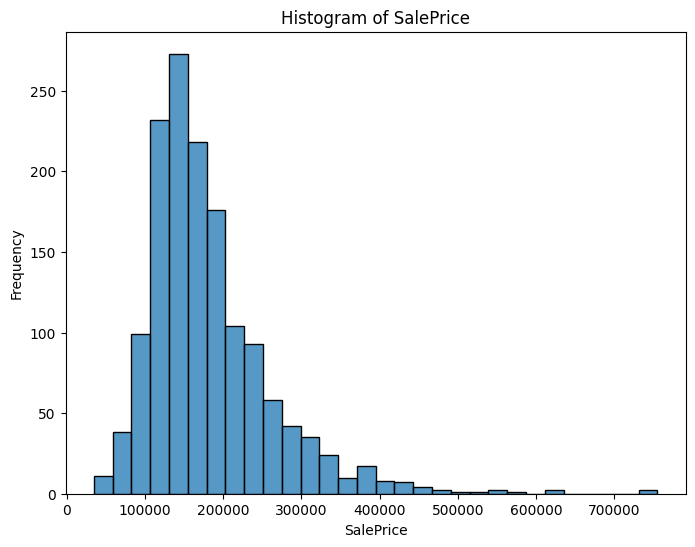

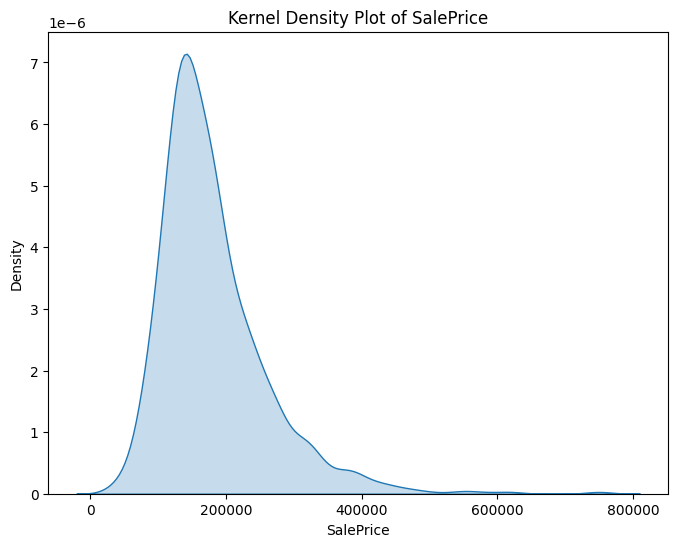

In [21]:
# Choose a numeric column to plot:-  'SalePrice'
House_Price_Plot = 'SalePrice'

# Plot histogram:-
plt.figure(figsize=(8, 6))
sns.histplot(df[House_Price_Plot], bins=30, kde=False)
plt.title(f'Histogram of {House_Price_Plot}')
plt.xlabel(House_Price_Plot)
plt.ylabel('Frequency')
plt.show()

# Plot kernel density estimate: 
plt.figure(figsize=(8, 6))
sns.kdeplot(df[House_Price_Plot], fill=True)
plt.title(f'Kernel Density Plot of {House_Price_Plot}')
plt.xlabel(House_Price_Plot)
plt.ylabel('Density')
plt.show()

In [ ]:
# 4. Multivariate Analysis:-

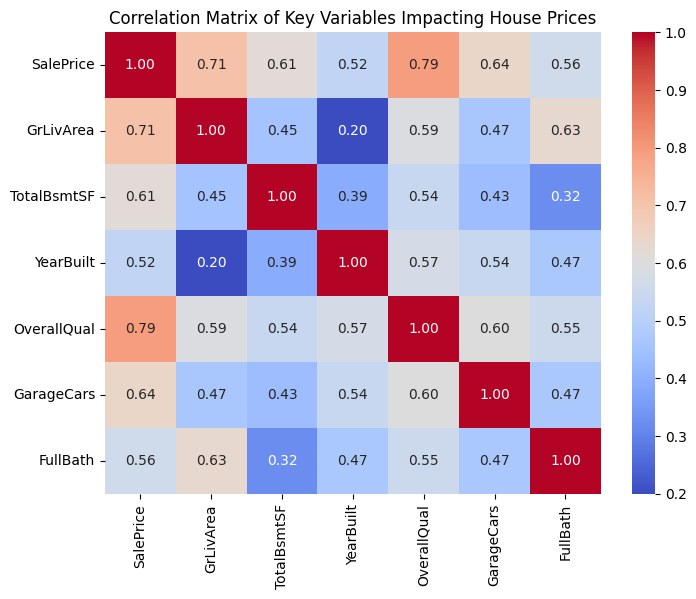

In [22]:
# Select key numeric columns related to house prices:-
key_vars = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'OverallQual', 'GarageCars', 'FullBath']

# Compute the correlation matrix:-
corr_matrix = df[key_vars].corr()

# Plot heatmap of the correlation matrix:-
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables Impacting House Prices')
plt.show()

In [ ]:
# 5. Feature Engineering:- 
### Common new features:

#Age of the house:- Difference between the year sold and year built.
#Total square footage:- Sum of living area above ground and basement area.
#Bathrooms total:- Sum of full and half bathrooms, possibly counting half baths as 0.5.
#Porch area total:- Sum of different porch-related areas (e.g., open porch, enclosed porch).
#Garage age:- Difference between year sold and garage built year.
#Interaction features: For example, quality multiplied by size as a proxy for overall value quality.

In [25]:
# Feature: Age of the house at the time of sale:-
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# Feature: Total square footage (above ground + basement):-
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']

# Feature: Total number of bathrooms (full + half, counting half as 0.5):-
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']

# Feature: Total porch area (sum of different porch areas):-
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Feature: Garage age:-
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
df['GarageAge'] = df['GarageAge'].fillna(df['HouseAge'])  # Fill missing garage year with house age

# Feature: Interaction of quality and size (proxy for value):-
df['QualAndSize'] = df['OverallQual'] * df['TotalSF']

# Display new feature columns:-
print(df[['HouseAge', 'TotalSF', 'TotalBathrooms', 'TotalPorchSF', 'GarageAge', 'QualAndSize']])

      HouseAge  TotalSF  TotalBathrooms  TotalPorchSF  GarageAge  QualAndSize
0            5     2566             3.5            61        5.0        17962
1           31     2524             2.5             0       31.0        15144
2            7     2706             3.5            42        7.0        18942
3           91     2473             2.0           307        8.0        17311
4            8     3343             3.5            84        8.0        26744
...        ...      ...             ...           ...        ...          ...
1455         8     2600             2.5            40        8.0        15600
1456        32     3615             3.0             0       32.0        21690
1457        69     3492             2.0            60       69.0        24444
1458        60     2156             2.0           112       60.0        10780
1459        43     2512             2.5            68       43.0        12560

[1460 rows x 6 columns]


In [ ]:
# 6.  Feature Engineering and Size Impact:-

#Calculation of total bathrooms by summing full and half bathrooms.
#Creation of scatter plots to visualize the relationship of bedrooms, bathrooms, and square footage with house prices.

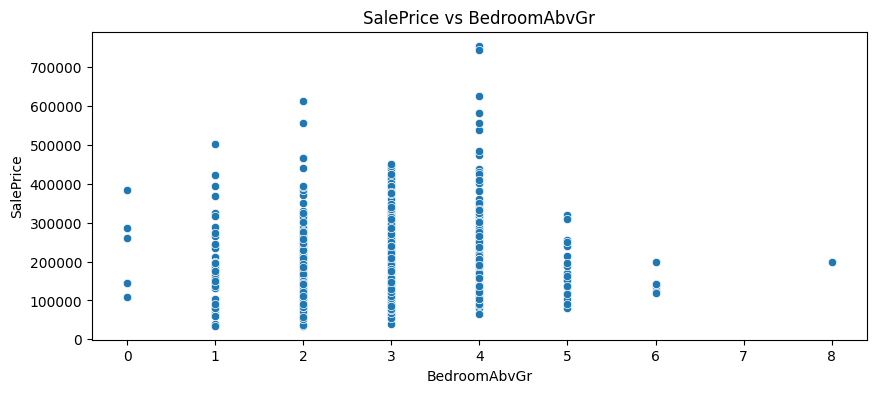

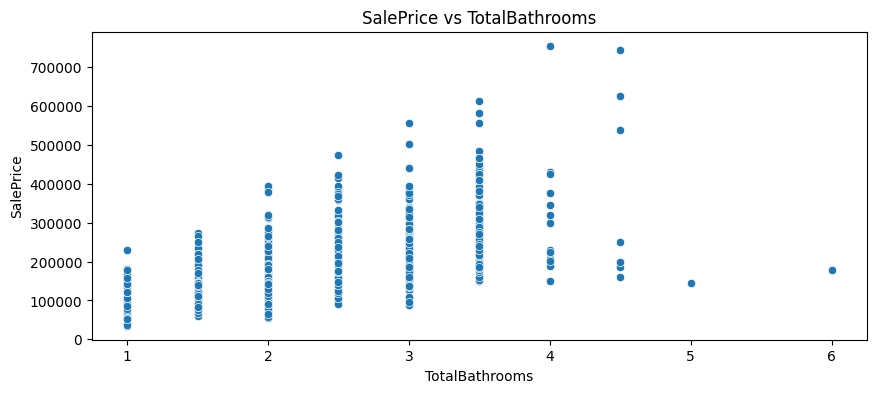

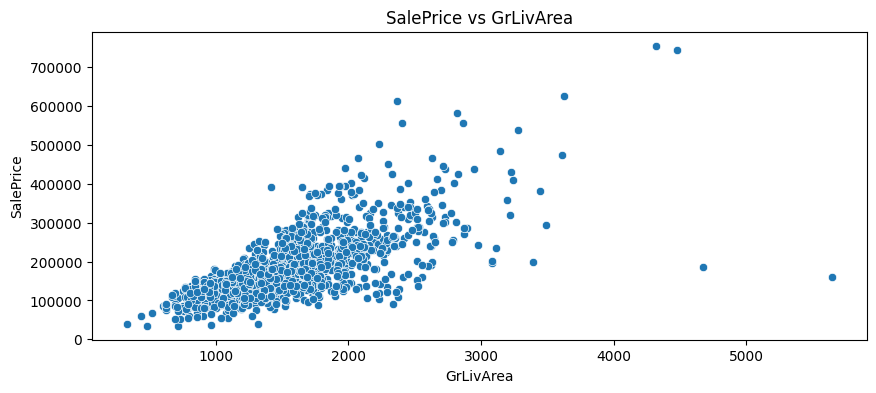

In [35]:
# Calculate total bathrooms (full + half counted as 0.5): - 
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']

# Select relevant features: -
features = ['BedroomAbvGr', 'TotalBathrooms', 'GrLivArea']

# Plot scatter plots of each feature against SalePrice: - 
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=df, x=feature, y='SalePrice')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [ ]:
# 7. Market Trends and Historical Pricing:  - 

##Visualize average house price trends annually or quarterly from your dataset.
##Suggest how to merge external economic indicators data for further analysis.

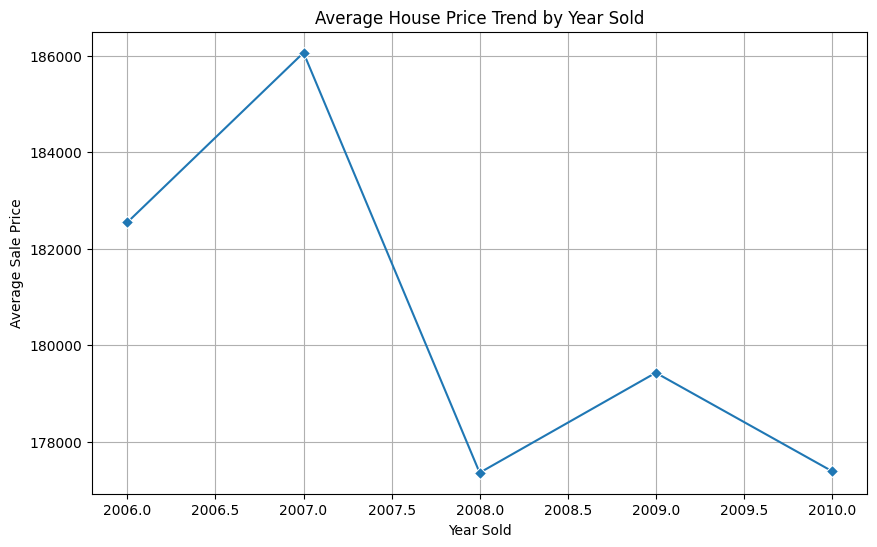

In [41]:
# Calculate average house price per year sold: - 
avg_price_per_year = df.groupby('YrSold')['SalePrice'].mean().reset_index()

# Plot average house price trend over years with markers : - 
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_per_year, x='YrSold', y='SalePrice', marker='D')
plt.title('Average House Price Trend by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

In [ ]:
# 8. Customer Preferences and Amenities:  - 
###To examine how specific amenities like swimming pools and garages impact house prices in your dataset, one approach is:

#Identify columns related to amenities, such as 'PoolArea', 'PoolQC' (pool quality), 'GarageArea', 'GarageQual' (garage quality).
#Analyze the average house prices for homes with and without these amenities or based on the quality grades.
#Use visualizations like boxplots or bar charts to compare distributions.
#Conduct statistical tests to see if price differences are significant.

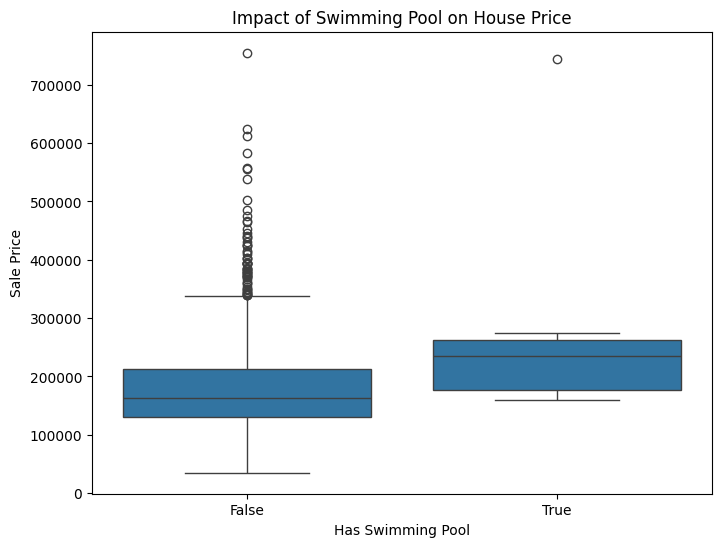

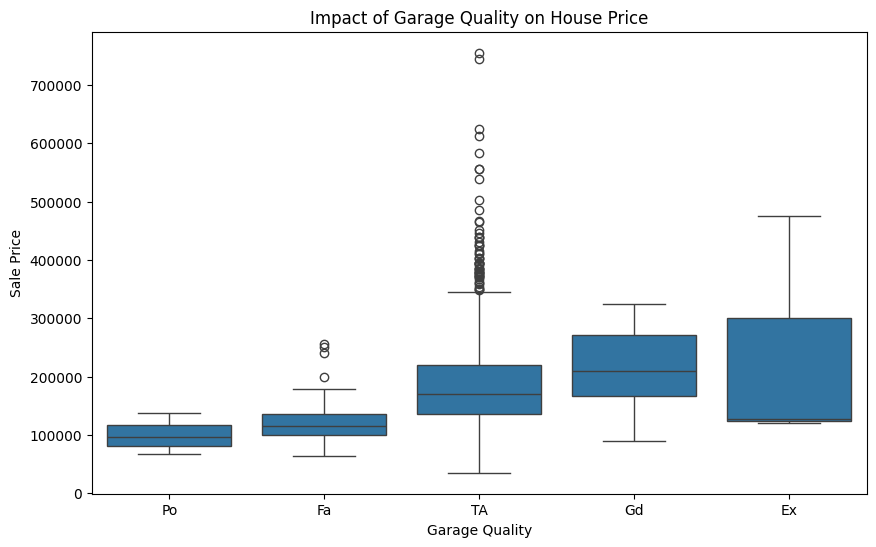

Average House Price by Pool Presence:
 HasPool
False    180404.663455
True     288138.571429
Name: SalePrice, dtype: float64

Average House Price by Garage Quality:
 GarageQual
Ex    241000.000000
Fa    123573.354167
Gd    215860.714286
Po    100166.666667
TA    187489.836003
Name: SalePrice, dtype: float64


In [31]:
# Analyze impact of swimming pool: - 
# Create a binary feature if pool exists (PoolArea > 0): - 
df['HasPool'] = df['PoolArea'] > 0

# Boxplot of SalePrice based on pool presence : - 
plt.figure(figsize=(8, 6))
sns.boxplot(x='HasPool', y='SalePrice', data=df)
plt.title('Impact of Swimming Pool on House Price')
plt.xlabel('Has Swimming Pool')
plt.ylabel('Sale Price')
plt.show()

# Analyze impact of garage quality on price: - 
# Consider only houses with garage: - 
df_garage = df[df['GarageArea'] > 0]

plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageQual', y='SalePrice', data=df_garage, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title('Impact of Garage Quality on House Price')
plt.xlabel('Garage Quality')
plt.ylabel('Sale Price')
plt.show()

# Calculate and print average prices for pools and garage qualities : - 
avg_price_pool = df.groupby('HasPool')['SalePrice'].mean()
avg_price_garagequal = df_garage.groupby('GarageQual')['SalePrice'].mean()

print("Average House Price by Pool Presence:\n", avg_price_pool)
print("\nAverage House Price by Garage Quality:\n", avg_price_garagequal)

In [ ]:
##Submission Date: 5th October, 2025    
# Thank You #